In [1]:
import pandas as pd

In [2]:
wti = pd.read_csv('data/WTI.csv', parse_dates=True, index_col='date', dayfirst=True)

In [3]:
wti_pct = wti.pct_change().dropna()

<AxesSubplot:xlabel='date'>

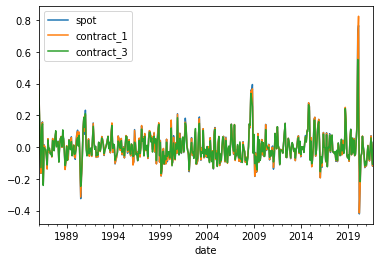

In [4]:
wti_pct.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
adf_spot = adfuller(wti_pct.spot)

In [7]:
print(adf_spot[1])

3.053250126635551e-25


In [8]:
adf_1 = adfuller(wti_pct.contract_1)
print(adf_1[1])

3.6766428513743814e-25


In [9]:
adf_3 = adfuller(wti_pct.contract_3)
print(adf_3[1])

8.746792702856164e-21


In [10]:
epu = pd.read_csv('data/EPUGlobal.csv', parse_dates=True, index_col='date', dayfirst=True)

In [11]:
epu_shock = epu.pct_change().diff().dropna()
epu_shock = epu_shock.loc[(epu_shock!=0).any(axis=1)]

<AxesSubplot:xlabel='date'>

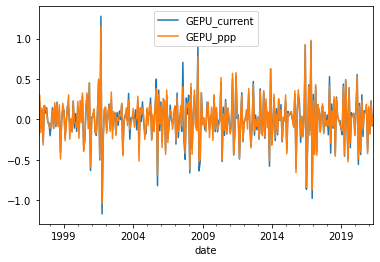

In [12]:
epu_shock.plot()

In [13]:
adf_gepu = adfuller(epu_shock.GEPU_current)
print(adf_gepu[1])

2.304215626134447e-12


In [14]:
import statsmodels.api as sm

In [15]:
df = wti_pct.join(epu_shock).dropna()
df.head()

,spot,contract_1,contract_3,GEPU_current,GEPU_ppp
date,,,,,
2021-05-01,-0.086999,-0.086755,-0.077974,0.051680,0.028355
2021-04-01,-0.052938,-0.053100,-0.050463,-0.083099,-0.067345
2021-03-01,0.009883,0.010697,0.008451,0.227285,0.226915
2021-02-01,-0.052784,-0.052919,-0.055117,-0.164491,-0.184622
2021-01-01,-0.119241,-0.117846,-0.112911,0.132958,0.158564


In [16]:
def news_regression(y_col, x_col, lags=12, df=df):
    x_cols = []
    for i in range(lags+1):
        new_col = f'{x_col}-lag{i}'
        df[new_col] = df[f'{x_col}'].shift(i)
        x_cols.append(new_col)
    df = df.dropna()
    return sm.OLS(df[y_col], sm.add_constant(df[x_cols])).fit()

In [17]:
model1 = news_regression('spot', 'GEPU_current')

In [18]:
model1.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     2.145
Date:                Tue, 28 Dec 2021   Prob (F-statistic):             0.0122
Time:                        00:46:10   Log-Likelihood:                 231.73
No. Observations:                 279   AIC:                            -435.5
Df Residuals:                     265   BIC:                            -384.6
Df Model:                          13                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0030      0.006      0.476      0.634      -0.009       0.015
GEPU_current-lag0     -0.0653      0.045     -1.465      0.144      -0.153       0.022
GEPU_current-lag1     -0.2021      0.079     -2.557      0.011      -0.358      -0.046
GEPU_current-lag2     -0.2960      0.100     -2.957      0.003      -0.493      -0.099
GEPU_current-lag3     -0.3197      0.113     -2.826      0.005      -0.542      -0.097
GEPU_current-lag4     -0.2985      0.118     -2.534      0.012      -0.530      -0.067
GEPU_current-lag5     -0.2238      0.115     -1.953      0.052      -0.449       0.002
GEPU_current-lag6     -0.1867      0.109     -1.709      0.089      -0.402       0.028
GEPU_current-lag7     -0.1409      0.100     -1.410      0.160      -0.338       0.056
GEPU_current-lag8     -0.1291      0.098     -1.315      0.190      -0.322       0.064
GEPU_current-lag9     -0.1592      0.095     -1.678      0.094      -0.346       0.028
GEPU_current-lag10    -0.0784      0.081     -0.963      0.337      -0.239       0.082
GEPU_current-lag11    -0.0608      0.059     -1.027      0.305      -0.177       0.056
GEPU_current-lag12    -0.0255      0.036     -0.716      0.475      -0.095       0.045
==============================================================================
Omnibus:                      135.940   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1628.277
Skew:                           1.639   Prob(JB):                         0.00
Kurtosis:                      14.372   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [19]:
model2 = news_regression('contract_1', 'GEPU_current')
model2.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_1   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     2.182
Date:                Tue, 28 Dec 2021   Prob (F-statistic):             0.0106
Time:                        00:46:10   Log-Likelihood:                 233.80
No. Observations:                 279   AIC:                            -439.6
Df Residuals:                     265   BIC:                            -388.8
Df Model:                          13                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0029      0.006      0.467      0.641      -0.009       0.015
GEPU_current-lag0     -0.0671      0.044     -1.522      0.129      -0.154       0.020
GEPU_current-lag1     -0.2037      0.081     -2.514      0.013      -0.363      -0.044
GEPU_current-lag2     -0.2980      0.101     -2.954      0.003      -0.497      -0.099
GEPU_current-lag3     -0.3247      0.115     -2.830      0.005      -0.551      -0.099
GEPU_current-lag4     -0.2998      0.117     -2.554      0.011      -0.531      -0.069
GEPU_current-lag5     -0.2271      0.115     -1.967      0.050      -0.454       0.000
GEPU_current-lag6     -0.1894      0.109     -1.736      0.084      -0.404       0.025
GEPU_current-lag7     -0.1427      0.100     -1.427      0.155      -0.339       0.054
GEPU_current-lag8     -0.1327      0.099     -1.340      0.181      -0.328       0.062
GEPU_current-lag9     -0.1613      0.096     -1.680      0.094      -0.350       0.028
GEPU_current-lag10    -0.0789      0.080     -0.984      0.326      -0.237       0.079
GEPU_current-lag11    -0.0604      0.059     -1.032      0.303      -0.176       0.055
GEPU_current-lag12    -0.0234      0.035     -0.677      0.499      -0.092       0.045
==============================================================================
Omnibus:                      135.559   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1654.679
Skew:                           1.626   Prob(JB):                         0.00
Kurtosis:                      14.479   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [20]:
model3 = news_regression('contract_3', 'GEPU_current')
model3.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_3   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2.411
Date:                Tue, 28 Dec 2021   Prob (F-statistic):            0.00436
Time:                        00:46:10   Log-Likelihood:                 303.07
No. Observations:                 279   AIC:                            -578.1
Df Residuals:                     265   BIC:                            -527.3
Df Model:                          13                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0010      0.005      0.200      0.841      -0.009       0.011
GEPU_current-lag0     -0.0728      0.030     -2.393      0.017      -0.133      -0.013
GEPU_current-lag1     -0.1757      0.050     -3.497      0.001      -0.275      -0.077
GEPU_current-lag2     -0.2655      0.064     -4.178      0.000      -0.391      -0.140
GEPU_current-lag3     -0.2750      0.070     -3.905      0.000      -0.414      -0.136
GEPU_current-lag4     -0.2632      0.079     -3.349      0.001      -0.418      -0.108
GEPU_current-lag5     -0.1987      0.077     -2.574      0.011      -0.351      -0.047
GEPU_current-lag6     -0.1632      0.076     -2.137      0.034      -0.314      -0.013
GEPU_current-lag7     -0.1207      0.069     -1.741      0.083      -0.257       0.016
GEPU_current-lag8     -0.1104      0.064     -1.736      0.084      -0.236       0.015
GEPU_current-lag9     -0.1123      0.059     -1.902      0.058      -0.229       0.004
GEPU_current-lag10    -0.0545      0.056     -0.968      0.334      -0.165       0.056
GEPU_current-lag11    -0.0415      0.045     -0.923      0.357      -0.130       0.047
GEPU_current-lag12    -0.0184      0.030     -0.608      0.544      -0.078       0.041
==============================================================================
Omnibus:                       82.999   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.540
Skew:                           1.178   Prob(JB):                     1.53e-75
Kurtosis:                       7.907   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [21]:
import matplotlib.pyplot as plt

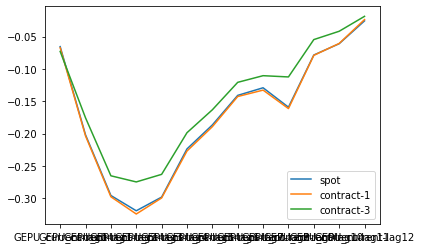

In [22]:
plt.plot(model1.params[1:], label='spot')
plt.plot(model2.params[1:], label='contract-1')
plt.plot(model3.params[1:], label='contract-3')
plt.legend()

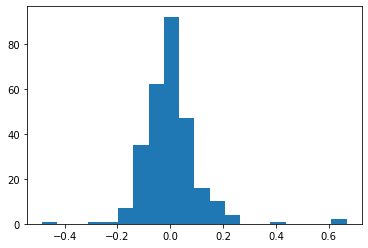

In [23]:
plt.hist(model1.resid, bins=20)
plt.show()

<AxesSubplot:xlabel='date'>

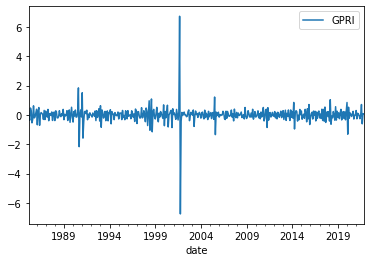

In [24]:
gpr = pd.read_csv('data/GPRGlobal.csv', parse_dates=True, index_col='date', dayfirst=True)
gpr_shock = gpr.pct_change().diff().dropna()
gpr_shock = gpr_shock.loc[(gpr_shock!=0).any(axis=1)]
gpr_shock.plot()

In [25]:
adf_gpr = adfuller(gpr_shock.GPRI)
print(adf_gpr[1])

3.201947929182281e-16


In [26]:
df1 = wti_pct.join(gpr_shock)

In [27]:
model4 = news_regression('spot', 'GPRI', df=df1)
model4.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                     1.397
Date:                Tue, 28 Dec 2021   Prob (F-statistic):              0.157
Time:                        00:46:10   Log-Likelihood:                 354.01
No. Observations:                 418   AIC:                            -680.0
Df Residuals:                     404   BIC:                            -623.5
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.005      0.695      0.488      -0.007       0.014
GPRI-lag0     -0.0182      0.012     -1.558      0.120      -0.041       0.005
GPRI-lag1     -0.0267      0.016     -1.669      0.096      -0.058       0.005
GPRI-lag2     -0.0192      0.020     -0.940      0.348      -0.059       0.021
GPRI-lag3     -0.0076      0.020     -0.389      0.697      -0.046       0.031
GPRI-lag4     -0.0115      0.019     -0.609      0.543      -0.049       0.026
GPRI-lag5     -0.0023      0.019     -0.121      0.904      -0.040       0.036
GPRI-lag6      0.0138      0.019      0.709      0.479      -0.024       0.052
GPRI-lag7      0.0152      0.020      0.774      0.440      -0.023       0.054
GPRI-lag8      0.0073      0.018      0.409      0.683      -0.028       0.042
GPRI-lag9      0.0027      0.015      0.176      0.861      -0.027       0.033
GPRI-lag10     0.0129      0.013      0.957      0.339      -0.014       0.039
GPRI-lag11    -0.0055      0.009     -0.593      0.554      -0.024       0.013
GPRI-lag12    -0.0024      0.007     -0.330      0.742      -0.017       0.012
==============================================================================
Omnibus:                      236.767   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3391.386
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      16.310   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [28]:
model5 = news_regression('contract_1', 'GPRI', df=df1)
model5.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_1   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                     1.350
Date:                Tue, 28 Dec 2021   Prob (F-statistic):              0.181
Time:                        00:46:11   Log-Likelihood:                 355.97
No. Observations:                 418   AIC:                            -683.9
Df Residuals:                     404   BIC:                            -627.4
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.005      0.686      0.493      -0.007       0.014
GPRI-lag0     -0.0175      0.011     -1.565      0.118      -0.039       0.004
GPRI-lag1     -0.0236      0.015     -1.541      0.124      -0.054       0.007
GPRI-lag2     -0.0182      0.020     -0.909      0.364      -0.058       0.021
GPRI-lag3     -0.0076      0.019     -0.393      0.694      -0.046       0.031
GPRI-lag4     -0.0121      0.019     -0.645      0.519      -0.049       0.025
GPRI-lag5     -0.0027      0.019     -0.141      0.888      -0.041       0.035
GPRI-lag6      0.0136      0.020      0.692      0.489      -0.025       0.052
GPRI-lag7      0.0150      0.020      0.766      0.444      -0.023       0.053
GPRI-lag8      0.0073      0.018      0.414      0.679      -0.027       0.042
GPRI-lag9      0.0038      0.015      0.254      0.800      -0.026       0.034
GPRI-lag10     0.0131      0.013      0.984      0.326      -0.013       0.039
GPRI-lag11    -0.0051      0.009     -0.556      0.578      -0.023       0.013
GPRI-lag12    -0.0016      0.007     -0.223      0.824      -0.016       0.013
==============================================================================
Omnibus:                      242.590   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3757.099
Skew:                           2.138   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [29]:
model6 = news_regression('contract_3', 'GPRI', df=df1)
model6.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_3   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                     1.209
Date:                Tue, 28 Dec 2021   Prob (F-statistic):              0.270
Time:                        00:46:11   Log-Likelihood:                 447.43
No. Observations:                 418   AIC:                            -866.9
Df Residuals:                     404   BIC:                            -810.4
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.004      0.424      0.672      -0.006       0.010
GPRI-lag0     -0.0203      0.009     -2.335      0.020      -0.037      -0.003
GPRI-lag1     -0.0276      0.013     -2.062      0.040      -0.054      -0.001
GPRI-lag2     -0.0242      0.016     -1.546      0.123      -0.055       0.007
GPRI-lag3     -0.0157      0.015     -1.033      0.302      -0.046       0.014
GPRI-lag4     -0.0209      0.015     -1.424      0.155      -0.050       0.008
GPRI-lag5     -0.0132      0.016     -0.826      0.409      -0.045       0.018
GPRI-lag6      0.0009      0.017      0.056      0.956      -0.032       0.034
GPRI-lag7      0.0057      0.017      0.328      0.743      -0.028       0.040
GPRI-lag8      0.0034      0.016      0.213      0.831      -0.028       0.034
GPRI-lag9      0.0039      0.014      0.286      0.775      -0.023       0.031
GPRI-lag10     0.0086      0.012      0.708      0.480      -0.015       0.033
GPRI-lag11    -0.0043      0.008     -0.545      0.586      -0.020       0.011
GPRI-lag12    -0.0027      0.007     -0.405      0.685      -0.016       0.010
==============================================================================
Omnibus:                      141.765   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.111
Skew:                           1.388   Prob(JB):                    3.11e-151
Kurtosis:                       8.665   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

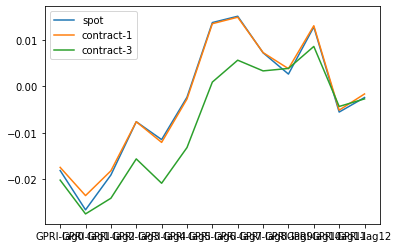

In [30]:
plt.plot(model4.params[1:], label='spot')
plt.plot(model5.params[1:], label='contract-1')
plt.plot(model6.params[1:], label='contract-3')
plt.legend()

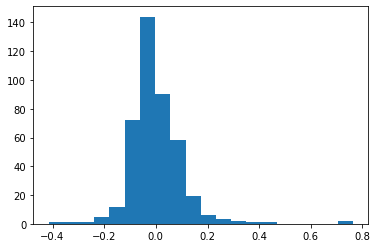

In [31]:
plt.hist(model4.resid, bins=20)
plt.show()

To test if our method is any good at all, we can try with stock prices and VIX index.

In [32]:
sp500 = pd.read_csv('data/SP500.csv', parse_dates=True, index_col='date', dayfirst=True)
vix = pd.read_csv('data/VIX.csv', parse_dates=True, index_col='date', dayfirst=True)

<AxesSubplot:xlabel='date'>

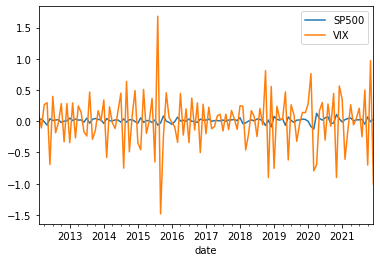

In [33]:
sp500_pct = sp500.pct_change().dropna()
vix_shock = vix.pct_change().diff().dropna()
df2 = sp500_pct.join(vix_shock)
df2.plot()

In [34]:
model7 = news_regression('SP500', 'VIX', df=df2)
model7.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     7.823
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           2.80e-10
Time:                        00:46:11   Log-Likelihood:                 244.94
No. Observations:                 107   AIC:                            -461.9
Df Residuals:                      93   BIC:                            -424.5
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.003      4.753      0.000       0.007       0.017
VIX-lag0      -0.1001      0.012     -8.201      0.000      -0.124      -0.076
VIX-lag1      -0.1259      0.021     -5.878      0.000      -0.168      -0.083
VIX-lag2      -0.1120      0.030     -3.723      0.000      -0.172      -0.052
VIX-lag3      -0.1021      0.033     -3.078      0.003      -0.168      -0.036
VIX-lag4      -0.0959      0.035     -2.765      0.007      -0.165      -0.027
VIX-lag5      -0.0860      0.034     -2.523      0.013      -0.154      -0.018
VIX-lag6      -0.0686      0.031     -2.224      0.029      -0.130      -0.007
VIX-lag7      -0.0662      0.029     -2.245      0.027      -0.125      -0.008
VIX-lag8      -0.0572      0.027     -2.138      0.035      -0.110      -0.004
VIX-lag9      -0.0382      0.020     -1.924      0.057      -0.078       0.001
VIX-lag10     -0.0315      0.015     -2.059      0.042      -0.062      -0.001
VIX-lag11     -0.0141      0.012     -1.186      0.239      -0.038       0.010
VIX-lag12     -0.0063      0.007     -0.890      0.376      -0.020       0.008
==============================================================================
Omnibus:                        5.283   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                6.967
Skew:                          -0.167   Prob(JB):                       0.0307
Kurtosis:                       4.205   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

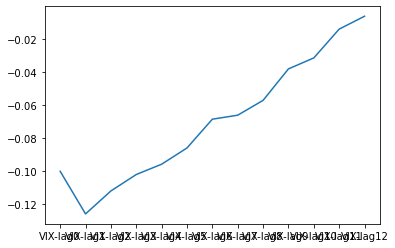

In [35]:
plt.plot(model7.params[1:])

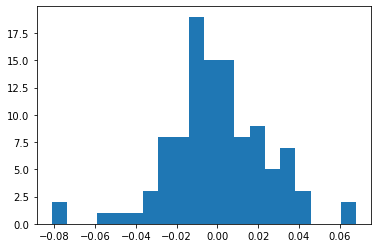

In [36]:
plt.hist(model7.resid, bins=20)
plt.show()